# Requirements: 

In [1]:
import pandas as pd
import numpy as np
import os
import os.path 

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix   
from sklearn.metrics import classification_report

from sklearn.metrics import brier_score_loss 
from sklearn.metrics import auc 

import warnings
warnings.filterwarnings('ignore')

In [2]:
DEFAULT_LINE_COLOUR = np.array([228, 26, 28], dtype=float) / 255
DEFAULT_LINE_WIDTH = 3
DEFAULT_RANDOM_LINE_COLOUR = np.full(3, 152. / 255)
DEFAULT_RANDOM_LINE_WIDTH = 2

LEVELS_FOR_CONTOURS = np.linspace(0, 1, num=11, dtype=float)

FIGURE_WIDTH_INCHES = 10
FIGURE_HEIGHT_INCHES = 10

FONT_SIZE = 20
plt.rc('font', size=FONT_SIZE)
plt.rc('axes', titlesize=FONT_SIZE)
plt.rc('axes', labelsize=FONT_SIZE)
plt.rc('xtick', labelsize=FONT_SIZE)
plt.rc('ytick', labelsize=FONT_SIZE)
plt.rc('legend', fontsize=FONT_SIZE)
plt.rc('figure', titlesize=FONT_SIZE)

#### Root Direction: 

In [3]:
root_dir  = '../trained_model/'

# 24 Hr lead time prediction evaluation based on skill metrics: 

<img src="SkillMetrics.png" width="800" height="400">

### Train

In [8]:
train_pred_category0_24hr = pd.read_csv(root_dir + 'VIS_Prob_TRAIN.csv')
ypredTr = train_pred_category0_24hr.to_numpy() 

train_true_category0_24hr = pd.read_csv(root_dir + 'VIS_True_TRAIN.csv')
ytrueTr = train_true_category0_24hr['CAT']
ytrueTr = ytrueTr.to_numpy().ravel()

In [9]:
accuray_list24, result_list24 = skilled_metrics(ytrueTr, ypredTr, 'HSS') 

The optima threshold is:  0.193
POD  :  0.941747572815534
F    :  0.0018667164457718873
FAR  :  0.09345794392523364
CSI  :  0.8584070796460177
PSS  :  0.939880856369762
HSS  :  0.9223161455434046
ORSS :  0.999768660874192
CSS  :  0.9054211892711048


(1000,)
(1000,)


<Figure size 720x720 with 0 Axes>

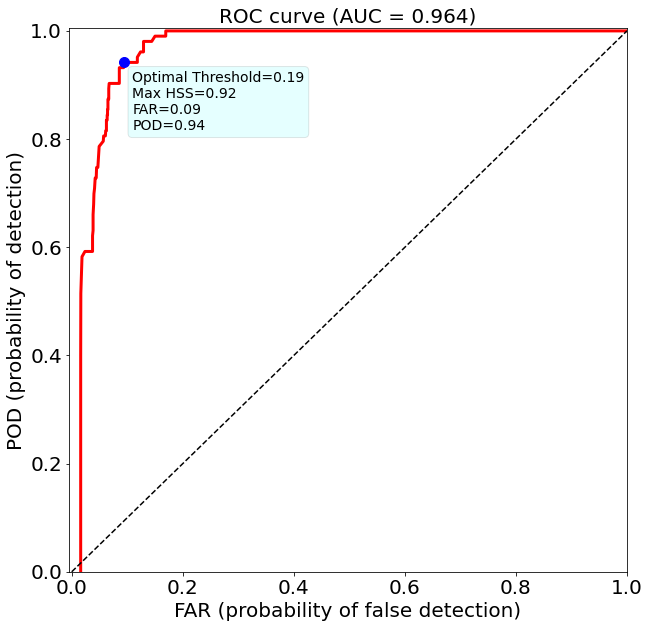

In [10]:
O_POD = accuray_list24[0]
O_HSS = accuray_list24[5]
O_FAR = accuray_list24[2] 
POD = result_list24[:, 0] 
print(POD.shape)
FAR = result_list24[:, 2]
print(FAR.shape)
FAR = np.nan_to_num(FAR, nan = 1)
FAR = np.sort(FAR)
#print(FAR.shape) 

Roc_Auc = auc(FAR, POD)

_ = ROC_Curve_Plot(FAR, POD, Roc_Auc, O_POD, O_FAR, O_HSS, 0.193) 

### Test

In [11]:
test_pred_category0_24hr = pd.read_csv(root_dir + 'VIS_Prob_TEST.csv')
ypred = test_pred_category0_24hr.to_numpy()

test_true_category0_24hr = pd.read_csv(root_dir + 'VIS_True_TEST.csv')
ytrue = test_true_category0_24hr['CAT']
ytrue = ytrue.to_numpy().ravel()

In [12]:
_ = test_eval(ytrue, ypred, 0.193)

POD  :  0.5522388059701493
F    :  0.016196205460434984
FAR  :  0.4861111111111111
CSI  :  0.3627450980392157
PSS  :  0.5360426005097143
HSS  :  0.517337457172948
ORSS :  0.973655158570855
CSS  :  0.49997423211708925


# Monthly Evaluaitng 

In [ ]:
matplotlib.rc_file_defaults()
#ax1 = sns.set_style(style=None, rc=None )

fig, axs = plt.subplots(2, 2, figsize=(16,12))

#plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
#            hspace = 0.1, wspace = 0.1)
#plt.margins(0,0)

legend_elements = [Line2D([0], [0], marker='o', color='g', label='Hit',
                         markerfacecolor='g'),
                   Line2D([0], [0], marker='s', color='r', label='Miss',
                          markerfacecolor='r'),
                   Line2D([0], [0], marker='D', color='b', label='False Alarm',
                          markerfacecolor='b')
]

NA = patches.Patch(color='dimgray', label='All Cases')
EU = patches.Patch(color='Khaki', label='Fog Cases')


##########Plot 1 6hr 
g = sns.barplot(data = AllData,  x='Month', y='Fog Cases', color='Khaki', edgecolor='white', ax=axs[0, 0])
g.set(ylim=(0, 25))
g.set(xlabel = None)

H6 = sns.scatterplot(data = AllData, x='Month', y='Hit6',  marker='o', s = 50, 
                     color='green', alpha=1, ax=axs[0, 0], zorder=10)
H6.set(xlabel = None)
M6 = sns.scatterplot(data = AllData, x='Month', y='Miss6', marker='s', s = 50, 
                     color='red',   alpha=1, ax=axs[0, 0], zorder=10)
M6.set(xlabel = None)
F6 = sns.scatterplot(data = AllData, x='Month', y='FA6',   marker='D', s = 50, 
                     color='blue',  alpha=1, ax=axs[0, 0], zorder=10)
F6.set(xlabel = None)


##########Plot 2 12hr 
g = sns.barplot(data = AllData,  x='Month', y='Fog Cases', color='Khaki', edgecolor='white', ax=axs[0, 1])
g.set(ylim=(0, 25))
H12 = sns.scatterplot(data = AllData, x='Month', y='Hit12',  marker='o', s = 50,  
                      color='green', alpha=1, ax=axs[0, 1], zorder=10)
M12 = sns.scatterplot(data = AllData, x='Month', y='Miss12', marker='s', s = 50, 
                      color='red',   alpha=1, ax=axs[0, 1], zorder=10)
F12 = sns.scatterplot(data = AllData, x='Month', y='FA12',   marker='D',  s = 50,
                      color='blue',  alpha=1, ax=axs[0, 1], zorder=10)

##########Plot 3 24hr 
g = sns.barplot(data = AllData,  x='Month', y='Fog Cases', color='Khaki', edgecolor='white', ax=axs[1, 0])
g.set(ylim=(0, 25))

H24 = sns.scatterplot(data = AllData, x='Month', y='Hit24',  marker='o', s = 50, 
                      color='green', alpha=1, ax=axs[1, 0], zorder=20)
M24 = sns.scatterplot(data = AllData, x='Month', y='Miss24', marker='s', s = 50, 
                      color='red',   alpha=1, ax=axs[1, 0], zorder=20)
F24 = sns.scatterplot(data = AllData, x='Month', y='FA24',   marker='D', s= 50,  
                      color='blue',  alpha=1, ax=axs[1, 0], zorder=20)

##########Plot 4 cases 
g1 = sns.barplot(data = NewData2,  x='Month', y='All Cases', color='dimgray', edgecolor='white', ax=axs[1, 1])
#g.set(ylim=(0, 25))
g2 = sns.barplot(data = NewData2,  x='Month', y='Fog Cases', color='Khaki', edgecolor='white', ax=axs[1, 1])

g1.set(ylim=(0, 270))
# Iterrating over the bars one-by-one 
for bar in g1.patches: 
    
  # Using Matplotlib's annotate function and 
  # passing the coordinates where the annotation shall be done 
  # x-coordinate: bar.get_x() + bar.get_width() / 2 
  # y-coordinate: bar.get_height() 
  # free space to be left to make graph pleasing: (0, 8) 
  # ha and va stand for the horizontal and vertical alignment 
    g1.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=10, xytext=(0, 6), 
                   textcoords='offset points') 


axs[0, 0].set_xlabel('Month', fontname = 'Times New Roman', fontsize=16)
axs[0, 0].set_ylabel('Number of Fog Cases', fontname = 'Times New Roman', fontsize=16)

axs[0, 1].set_xlabel('Month', fontname = 'Times New Roman', fontsize=16)
axs[0, 1].set_ylabel('Number of Fog Cases', fontname = 'Times New Roman', fontsize=16)

axs[1, 0].set_xlabel('Month', fontname = 'Times New Roman', fontsize=16)
axs[1, 0].set_ylabel('Number of Fog Cases', fontname = 'Times New Roman', fontsize=16)

axs[1, 1].set_xlabel('Month', fontname = 'Times New Roman', fontsize=16)
axs[1, 1].set_ylabel('Number of All Cases vs Fog Cases', fontname = 'Times New Roman', fontsize=16)


plt.setp(axs[0, 0].xaxis.get_majorticklabels(), fontname = 'Times New Roman', fontsize=16)
axs[0, 0].set_xlabel('')
plt.setp(axs[0, 0].yaxis.get_majorticklabels(), fontname = 'Times New Roman')

axs[0, 1].set_xlabel('')
plt.setp(axs[0, 1].xaxis.get_majorticklabels(), fontname = 'Times New Roman', fontsize=16)
plt.setp(axs[0, 1].yaxis.get_majorticklabels(), fontname = 'Times New Roman')

plt.setp(axs[1, 0].xaxis.get_majorticklabels(), fontname = 'Times New Roman', fontsize=16)
plt.setp(axs[1, 0].yaxis.get_majorticklabels(), fontname = 'Times New Roman')

plt.setp(axs[1, 1].xaxis.get_majorticklabels(), fontname = 'Times New Roman', fontsize=16)
plt.setp(axs[1, 1].yaxis.get_majorticklabels(), fontname = 'Times New Roman')

axs[0, 0].legend(handles=legend_elements, loc = 'upper left')
axs[0, 1].legend(handles=legend_elements, loc = 'upper left')
axs[1, 0].legend(handles=legend_elements, loc = 'upper left')

axs[1, 1].legend(handles=[NA,EU], loc='upper right')


axs[0, 0].set_title('FogNet Monthly Performance, 6Hr Prediction', fontname = 'Times New Roman', fontsize=18)
axs[0, 1].set_title('FogNet Monthly Performance, 12Hr Prediction', fontname = 'Times New Roman', fontsize=18)
axs[1, 0].set_title('FogNet Monthly Performance, 24Hr Prediction', fontname = 'Times New Roman', fontsize=18)
axs[1, 1].set_title('Number of Cases vs Fog Cases for Independent Data', fontname = 'Times New Roman', fontsize=18)

filename = 'output2.png'
plt.savefig(filename, dpi = 300) 

# Functions: 

In [4]:
def Optimal_Thr(ytrue, ypred): 
    ypred_ = np.zeros_like(ytrue)
    results = np.empty(shape = (1000, 8), dtype='float')
    th_list = np.arange(0, 1, 0.001).tolist()
    for j in range(1000):
        th = th_list[j]
        for i in range(len(ytrue)):
            prob = ypred[i, 1] 
            if prob > th:
                ypred_[i] = 1
            else:
                ypred_[i] = 0    
        Hit, miss, FA, CR = confusion_matrix(ytrue, ypred_).ravel()

        POD = Hit/(Hit+miss)
        results[j, 0] = POD
        
        F   = FA/(FA+CR)
        results[j, 1] = F

        FAR  = FA/(Hit+FA)
        results[j,2] = FAR

        CSI = Hit/(Hit+FA+miss)
        results[j, 3] = CSI

        PSS = ((Hit*CR)-(FA*miss))/((FA+CR)*(Hit+miss))
        results[j, 4] = PSS

        HSS = (2*((Hit*CR)-(FA*miss)))/(((Hit+miss)*(miss+CR))+((Hit+FA)*(FA+CR)))
        results[j, 5] = HSS

        ORSS = ((Hit*CR)-(FA*miss))/((Hit*CR)+(FA*miss))
        results[j, 6] = ORSS

        CSS = ((Hit*CR)-(FA*miss))/((Hit+FA)*(miss+CR))
        results[j, 7] = CSS
 
    return th_list, results

In [5]:
def test_eval(y, ypred, th): 
    length = len(ypred) 
    ypred_ = [0]*length

    for i in range(length):
        prob = ypred[i, 1] 
        if prob > th:
            ypred_[i] = 1
        else:
            ypred_[i] = 0
    ypred_ = np.array(ypred_)
    tn, fp, fn, tp = confusion_matrix(y, ypred_).ravel()
    a = tn     # Hit
    b = fn      # false alarm
    c = fp      # miss
    d = tp    # correct rejection 

    POD = a/(a+c)
    F   = b/(b+d)
    FAR  = b/(a+b)
    CSI = a/(a+b+c)
    PSS = ((a*d)-(b*c))/((b+d)*(a+c))
    HSS = (2*((a*d)-(b*c)))/(((a+c)*(c+d))+((a+b)*(b+d)))
    ORSS = ((a*d)-(b*c))/((a*d)+(b*c))
    CSS = ((a*d)-(b*c))/((a+b)*(c+d))

    print('POD  : ', POD) 
    print('F    : ', F)
    print('FAR  : ', FAR)
    print('CSI  : ', CSI)
    print('PSS  : ', PSS)
    print('HSS  : ', HSS)
    print('ORSS : ', ORSS)
    print('CSS  : ', CSS)

In [6]:
def skilled_metrics(y, ypred, metric): 
    threshold_list, result_list = Optimal_Thr(y, ypred)
    if metric == 'PSS':
        PSS = result_list[:, 4]
        raws = np.where(PSS == np.amax(PSS))[-1] 
        length_raws = len(raws) 
        if length_raws == 1:
            accuray_list = result_list[raws[0], :] 
            optimal_threshold = threshold_list[raws[0]]
        else:
            accuray_list = result_list[raws[-1], :] 
            optimal_threshold = threshold_list[raws[-1]]

    if metric == 'HSS':
        
        HSS = result_list[:, 5]
        raws = np.where(HSS == np.amax(HSS))[-1] 
        length_raws = len(raws) 
        if length_raws == 1:
            accuray_list = result_list[raws[0], :] 
            optimal_threshold = threshold_list[raws[0]]
        else:
            accuray_list = result_list[raws[-1], :]
            optimal_threshold = threshold_list[raws[-1]]
    print('The optima threshold is: ', optimal_threshold)
    print('POD  : ', accuray_list[0]) 
    print('F    : ', accuray_list[1])
    print('FAR  : ', accuray_list[2])
    print('CSI  : ', accuray_list[3])
    print('PSS  : ', accuray_list[4])
    print('HSS  : ', accuray_list[5])
    print('ORSS : ', accuray_list[6])
    print('CSS  : ', accuray_list[7])

    return accuray_list, result_list 

In [7]:
def ROC_Curve_Plot(FAR, POD, Roc_Auc, O_POD, O_FAR, O_HSS, Th): 
    plt.figure(figsize = (10, 10))

    axes_object = None
    if axes_object is None:
        _, axes_object = plt.subplots(
            1, 1, figsize=(FIGURE_WIDTH_INCHES, FIGURE_HEIGHT_INCHES)
        )
    #textstr = 'Max HSS=%.2f' % (O_HSS) 
    textstr = '\n'.join((
    r'Optimal Threshold=%.2f' % (Th, ),
    r'Max HSS=%.2f' % (O_HSS, ), 
    r'FAR=%.2f' % (O_FAR, ), 
    r'POD=%.2f' % (O_POD, )))
    
    props = dict(boxstyle='round', facecolor='cyan', alpha=0.1)
    
    plt.plot(FAR, POD, linewidth=3, color = 'red')
    #plt.plot([O_FAR, O_FAR], [0, O_POD], 'b--', linewidth=0.5)
    #plt.plot([0, O_FAR], [O_POD, O_POD], 'b--', linewidth=0.5) 
    plt.plot(O_FAR, O_POD, 'bo', markersize=10) 
    plt.plot([0, 1], [0, 1], 'k--')
    
    axes_object.text(O_FAR + 0.02, O_POD - 0.02, textstr, size=50, rotation=0, transform=axes_object.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    plt.xlim([-0.005, 1.0])
    plt.ylim([0.0, 1.005])
    plt.xlabel('FAR (probability of false detection)',  fontsize=20)
    plt.ylabel('POD (probability of detection)', fontsize=20)
    title_string = 'ROC curve (AUC = {0:.3f})'.format(Roc_Auc)
    plt.title(title_string, fontsize=20)